In [1]:
import cv2
from  matplotlib import pyplot as plt
import numpy as np

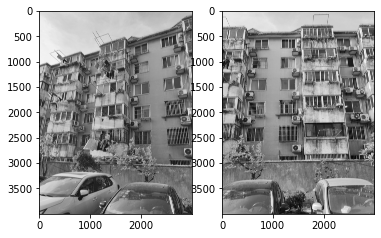

In [2]:
# readin picture
target_folder = 'building'

# make sure "1.png" is in the left
pic_1_path = target_folder+'/1.png'
pic_2_path = target_folder+'/2.png'

image_1 = cv2.cvtColor(cv2.imread(pic_1_path),cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread(pic_2_path),cv2.COLOR_BGR2RGB)

gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(gray_1, cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(gray_2, cmap ='gray')
plt.show()

In [3]:
# find points and descriptors of img
def find_points(img):
    sift = cv2.SIFT.create()
    key_points,descriptors = sift.detectAndCompute(img,None)
    points = []
    for point in key_points:
        points.append(point.pt)
    points = np.float32(np.array(points))
    return points, descriptors

In [4]:
# get transformation matrix
def match(key_points_1, key_points_2, features_1, features_2):
    matcher = cv2.DescriptorMatcher_create("BruteForce")
    matches = matcher.knnMatch(features_1, features_2, 2)

    points_1 = []
    points_2 = []
    for match in matches:
        points_1.append(key_points_1[match[0].queryIdx])
        points_2.append(key_points_2[match[0].trainIdx])

    points_1 = np.float32(np.array(points_1))
    points_2 = np.float32(np.array(points_2))

    H, _ = cv2.findHomography(points_2, points_1, cv2.RANSAC, 5.0)

    return H

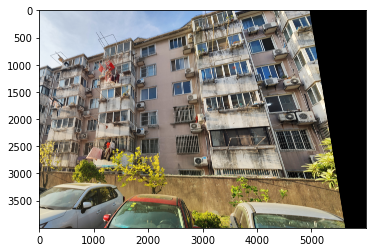

In [5]:
# main
points_1,descriptors_1 = find_points(gray_1)
points_2,descriptors_2 = find_points(gray_2)

H = match(points_1, points_2, descriptors_1, descriptors_2)

result = cv2.warpPerspective(image_2, H, (image_1.shape[1] + image_2.shape[1], image_1.shape[0]))
result[0:image_1.shape[0], 0:image_1.shape[1]] = image_1

cv2.imwrite(target_folder+'/result.png',cv2.cvtColor(result,cv2.COLOR_RGB2BGR))

plt.imshow(result)
plt.show()